In [12]:
import os
import sys

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *



In [44]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 64
max_iterations = 500

optimizers = {}
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_acc = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_acc[key] = []
    train_loss[key] = []


In [45]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        acc = networks[key].accuracy(x_batch, t_batch)
        train_acc[key].append(acc)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            acc = networks[key].accuracy(x_batch, t_batch)
            print(key + ":" + str(acc))
            print(key + ":" + str(loss))


===========iteration:0===========
Momentum:0.109375
Momentum:2.183624036469049
AdaGrad:0.34375
AdaGrad:2.183624036469049
Adam:0.28125
Adam:2.183624036469049
===========iteration:100===========
Momentum:0.96875
Momentum:0.2112902777344163
AdaGrad:0.96875
AdaGrad:0.2112902777344163
Adam:0.890625
Adam:0.2112902777344163
===========iteration:200===========
Momentum:0.8125
Momentum:0.39289603100235027
AdaGrad:0.953125
AdaGrad:0.39289603100235027
Adam:0.890625
Adam:0.39289603100235027
===========iteration:300===========
Momentum:0.9375
Momentum:0.10486986321646843
AdaGrad:1.0
AdaGrad:0.10486986321646843
Adam:0.984375
Adam:0.10486986321646843
===========iteration:400===========
Momentum:0.984375
Momentum:0.09601872404792793
AdaGrad:1.0
AdaGrad:0.09601872404792793
Adam:0.953125
Adam:0.09601872404792793


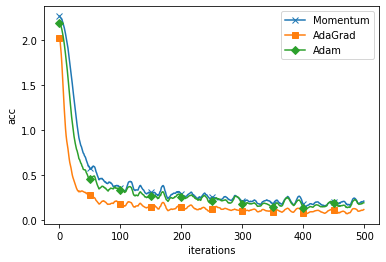

In [46]:
markers = {"Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=50, label=key)
plt.xlabel("iterations")
plt.ylabel("acc")
plt.legend()
plt.show()

In [47]:
for key in optimizers.keys():
    print(key + ":" + str(max(train_acc[key])))
    print(key + ":" + str(min(train_loss[key])))

Momentum:1.0
Momentum:0.056235422531880255
AdaGrad:1.0
AdaGrad:0.022238102195279115
Adam:1.0
Adam:0.04381467987279032


In [48]:
optimizers = {}
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()


networks = {}
train_acc = {}
train_loss = {}


for key in optimizers.keys():
    networks[key] = MultiLayerNetExtend(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        use_dropout=True, dropout_ration=0.3, use_batchnorm=True,
        output_size=10)
    train_acc[key] = []
    train_loss[key] = []

In [49]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        acc = networks[key].accuracy(x_batch, t_batch)
        train_acc[key].append(acc)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            acc = networks[key].accuracy(x_batch, t_batch)
            print(key + ":" + str(acc))
            print(key + ":" + str(loss))


===========iteration:0===========
AdaGrad:0.203125
AdaGrad:13.849752505648727
Adam:0.109375
Adam:13.849752505648727
===========iteration:100===========
AdaGrad:0.9375
AdaGrad:0.8704065327091829
Adam:0.8125
Adam:0.8704065327091829
===========iteration:200===========
AdaGrad:0.90625
AdaGrad:0.43307168619694614
Adam:0.875
Adam:0.43307168619694614
===========iteration:300===========
AdaGrad:0.921875
AdaGrad:0.34060522186797904
Adam:0.953125
Adam:0.34060522186797904
===========iteration:400===========
AdaGrad:0.875
AdaGrad:0.3667066808060799
Adam:0.875
Adam:0.3667066808060799


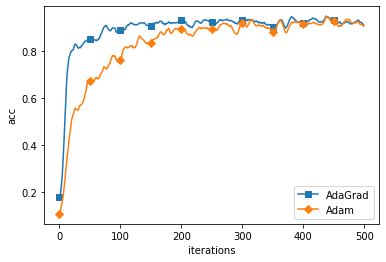

In [50]:
markers = {"AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_acc[key]), marker=markers[key], markevery=50, label=key)
plt.xlabel("iterations")
plt.ylabel("acc")
plt.legend()
plt.show()

In [51]:
for key in optimizers.keys():
    print(key + ":" + str(max(train_acc[key])))
    print(key + ":" + str(min(train_loss[key])))

AdaGrad:1.0
AdaGrad:0.06689314816017657
Adam:1.0
Adam:0.08433965458158674
